### Exercise Scaling DC HousingProperties-Claudia

Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "C:/Data/daBootcamp/dataSets/dc_properties.csv"

df = pd.read_csv(filepath)
df.head()

C:\Users\claudia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234CAEB7408>,
      dtype=object)

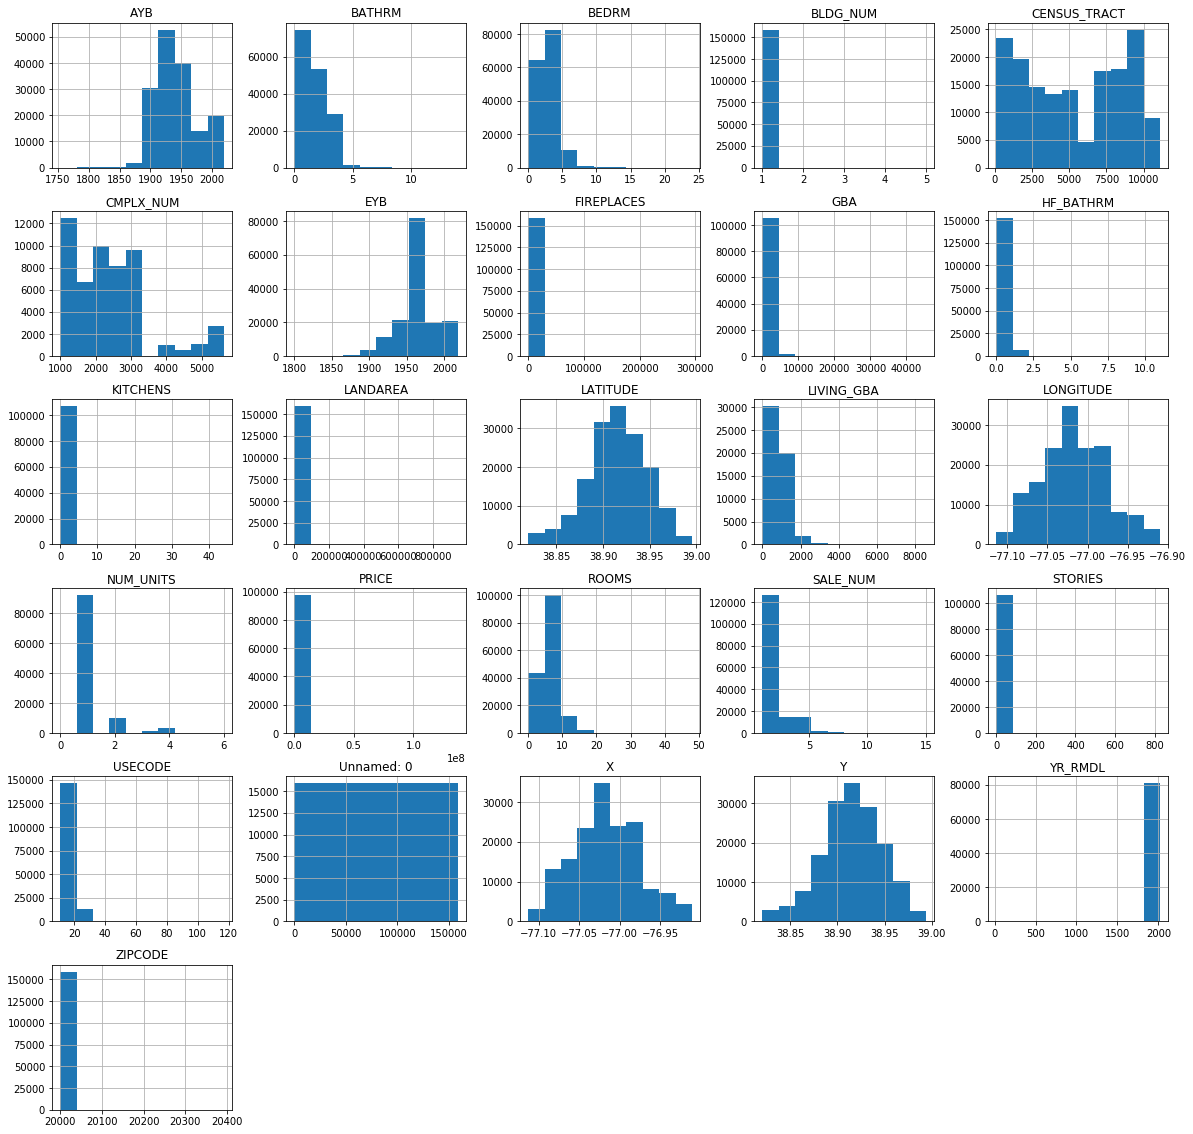

In [3]:
df.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7A084EE48>,
      dtype=object)

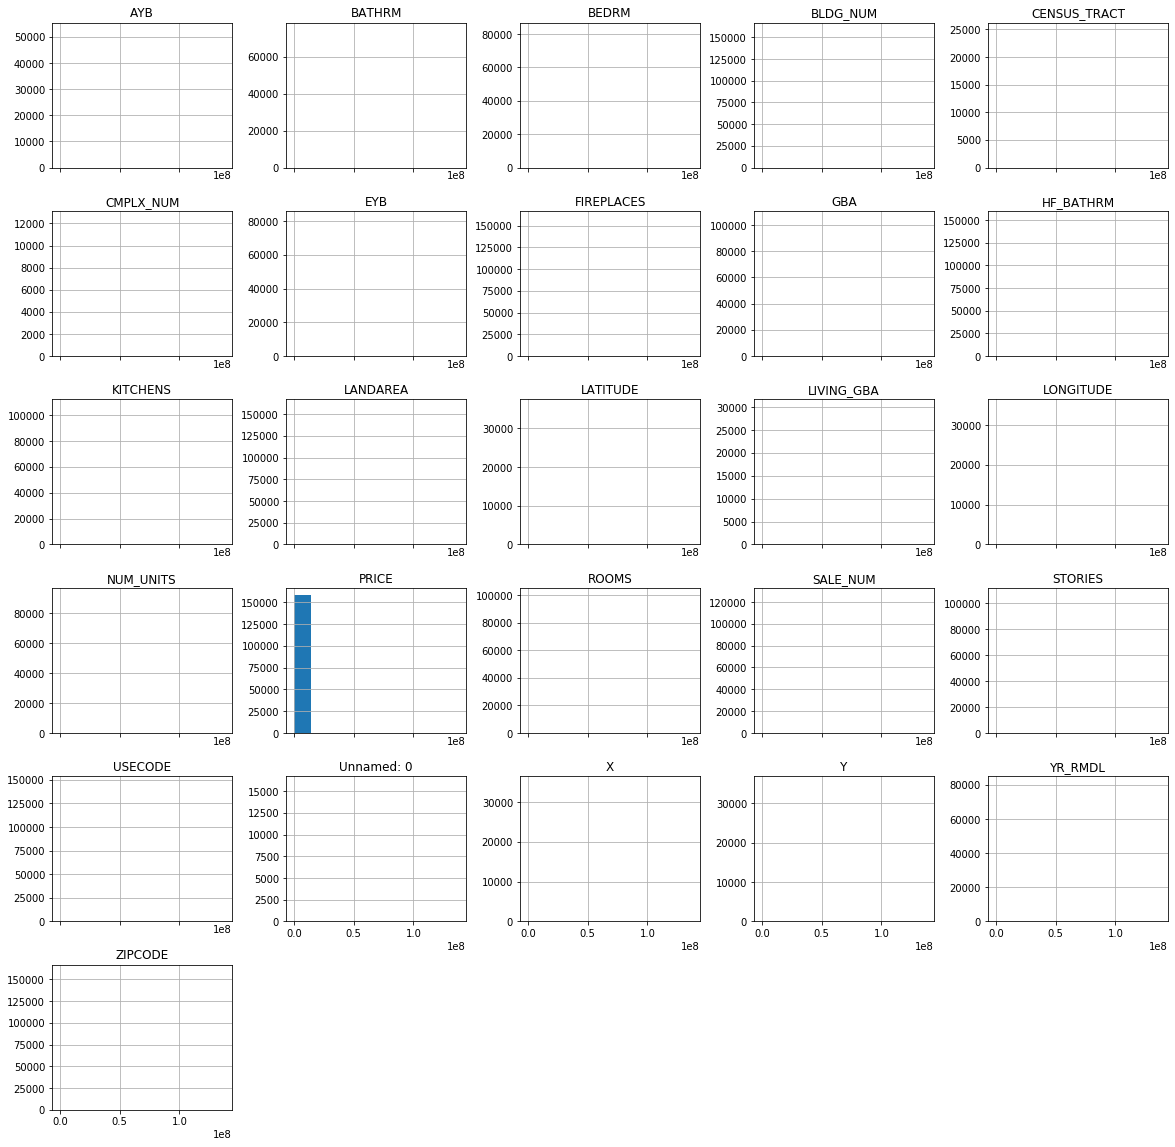

In [10]:
df.hist(figsize=(20,20),sharex=True)

In [4]:
#1.- Identify how many missing values we have for column PRICE
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [5]:
#2.- replace empty cells with average of column
df["PRICE"].fillna(df["PRICE"].mean(), inplace=True)

In [6]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


## Z-score

In [16]:
#3.- Method 1 Manual calculation

#Meand of the column
cMean= df['PRICE'].mean()
cMean

#Standad deviation of the column


931351.5949342768

In [18]:
#4.- #standard deviation of the column
cStd= df['PRICE'].std()
cStd

5550558.004606821

In [20]:
#5.- each value in column minus the mean and then divide by the standard deviation
zManual=(df['PRICE']-cMean)/cStd

In [21]:
zManual.head()

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [22]:
#Method 2: use scikit-learn to calculate Z-scores

#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()


In [23]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
# it will be a new dataframe with one column
priceZScore=scaler.fit_transform(df[['PRICE']])

In [35]:
#mean and standard deviation of z-score standardized 'PRICE' column
priceZScore.mean(), priceZScore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [36]:
priceZScore

array([[ 2.94833276e-02],
       [ 2.09736909e-17],
       [ 2.10546774e-01],
       ...,
       [-5.96971758e-02],
       [-1.29041773e-01],
       [ 2.09736909e-17]])

In [37]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)

priceZScoreCol= pd.Series(priceZScore.reshape(-1))

In [38]:
priceZScoreCol.head()


0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

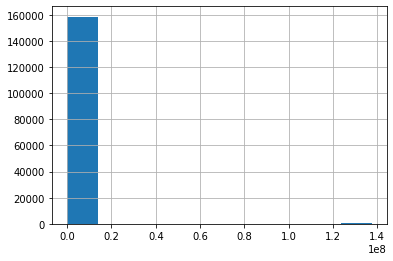

In [31]:
##BEFORE: frequency count plot of 'Glucose' column
df['PRICE'].hist()

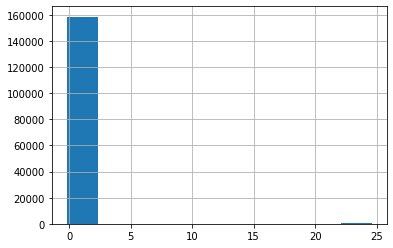

In [39]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
priceZScoreCol.hist()


## Min-max Scaling

In [40]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [41]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
priceMinmax = minmax_sc.fit_transform(df[['PRICE']])

In [43]:
type(priceMinmax)

numpy.ndarray

In [44]:
print(priceMinmax)

[[0.00796783]
 [0.00677703]
 [0.01528077]
 ...
 [0.00436593]
 [0.00156518]
 [0.00677703]]


In [47]:
#mean and standard deviation of Min-Max 'PRICE' column
priceMinmax.mean(), priceMinmax.std()

(0.0067770300467104, 0.04038885061696727)

In [48]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
price_mm_col = pd.Series(priceMinmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [49]:
#verify the range is between 0 and 1
price_mm_col.min(), price_mm_col.max()

(0.0, 0.9999999999999999)

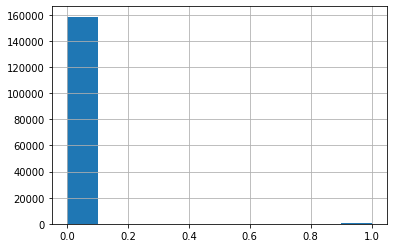

In [50]:
price_mm_col.hist()

In [51]:

#list to hold column names
colnames = list(df.columns)


In [52]:
colnames

['Unnamed: 0',
 'BATHRM',
 'HF_BATHRM',
 'HEAT',
 'AC',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALEDATE',
 'PRICE',
 'QUALIFIED',
 'SALE_NUM',
 'GBA',
 'BLDG_NUM',
 'STYLE',
 'STRUCT',
 'GRADE',
 'CNDTN',
 'EXTWALL',
 'ROOF',
 'INTWALL',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA',
 'GIS_LAST_MOD_DTTM',
 'SOURCE',
 'CMPLX_NUM',
 'LIVING_GBA',
 'FULLADDRESS',
 'CITY',
 'STATE',
 'ZIPCODE',
 'NATIONALGRID',
 'LATITUDE',
 'LONGITUDE',
 'ASSESSMENT_NBHD',
 'ASSESSMENT_SUBNBHD',
 'CENSUS_TRACT',
 'CENSUS_BLOCK',
 'WARD',
 'SQUARE',
 'X',
 'Y',
 'QUADRANT']